## Back Propagation

Uno de los objetivos en el aprendizaje de una red neuronal es tener una función objetivo definida que debe ser una función de coste que queremos minimizar. Definimos la función de coste J, para aprender los pesos como la suma de errores cuadráticos (Sum Squared Error), entre la salida calculada y la etiqueta de clase verdadera:

$$J(w) = \frac{1}{2}\sum (y_{i} - \hat{y}_{i})^2$$


El algoritmo de optimización para reducir el error que vamos a utilizar será el gradiente descendente.



$$\Delta w = -\eta \bigtriangledown J(w)$$

El cambio del peso se define como el gradiente negativo multiplicado por el rango de aprendizaje (eta o learning rate).


**Ejemplo**:

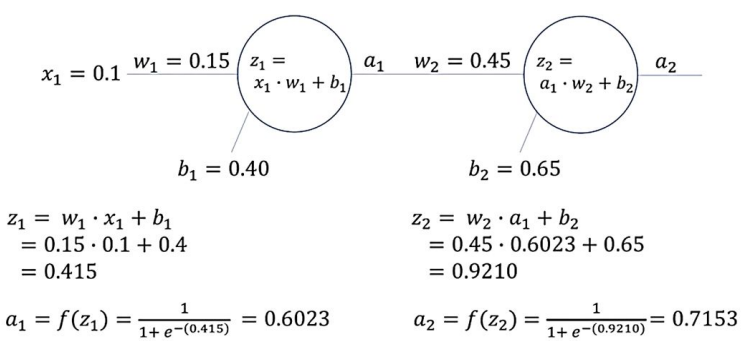

Para disminuir el error se utiliza el gradiente descendente y se actualiza los pesos y los biases.

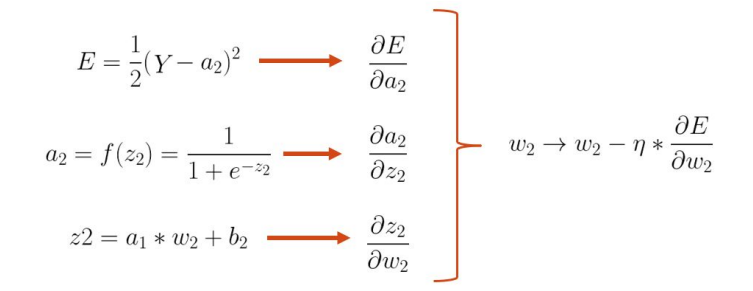

Para actualizar el peso de w2:

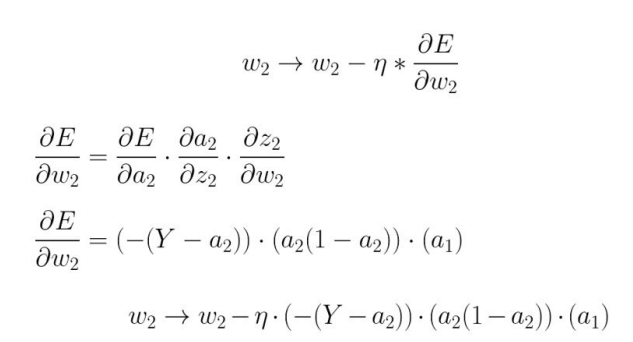

Para actualizar el bias b2:
    
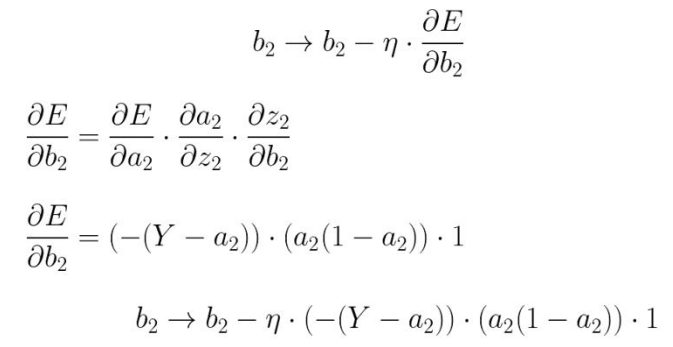

Para actualizar el peso w1:

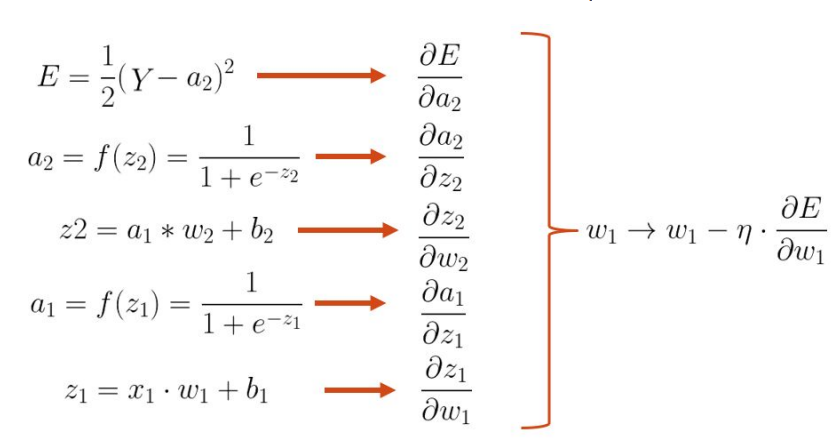

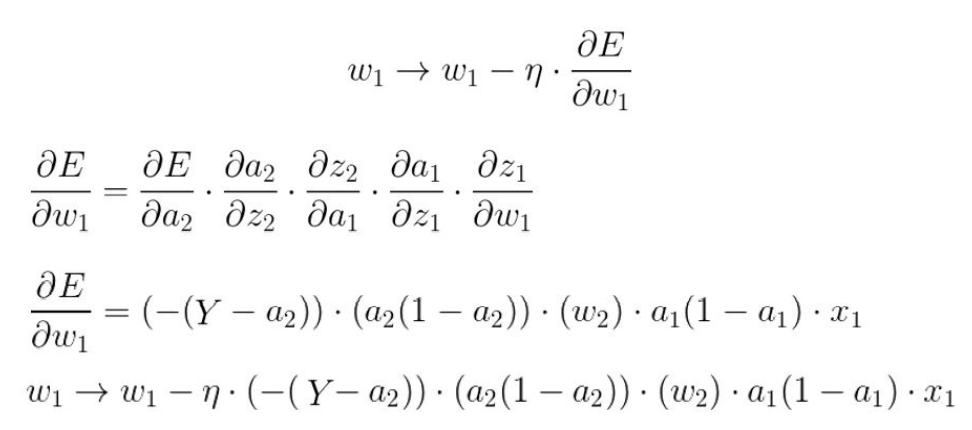

Para actualizar el bias b1:

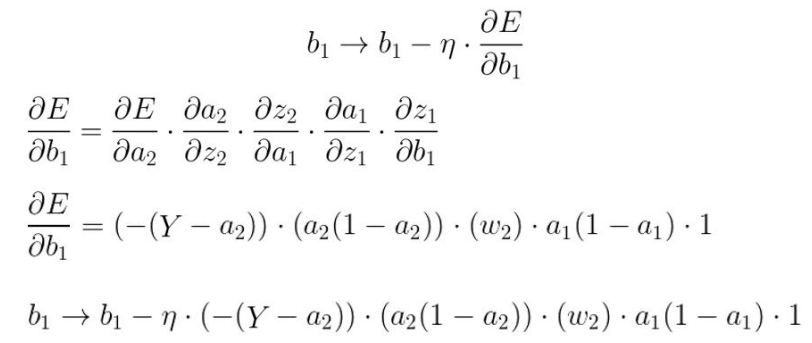

Algoritmo:

1. Inicializar los pesos y el bias de cada neurona.
2. Iterativamente repetir los siguientes pasos:
3. Calcular la salida de la red neuronal 
4. Calcular el error entre la salida esperada y la predicha
5. Actualizar los pesos y el bias de cada neurona.
6. Repetir los últimos 3 pasos hasta alcanzar el número de iteraciones o épocas que se desean.

### Ejemplo/Ejercicio:

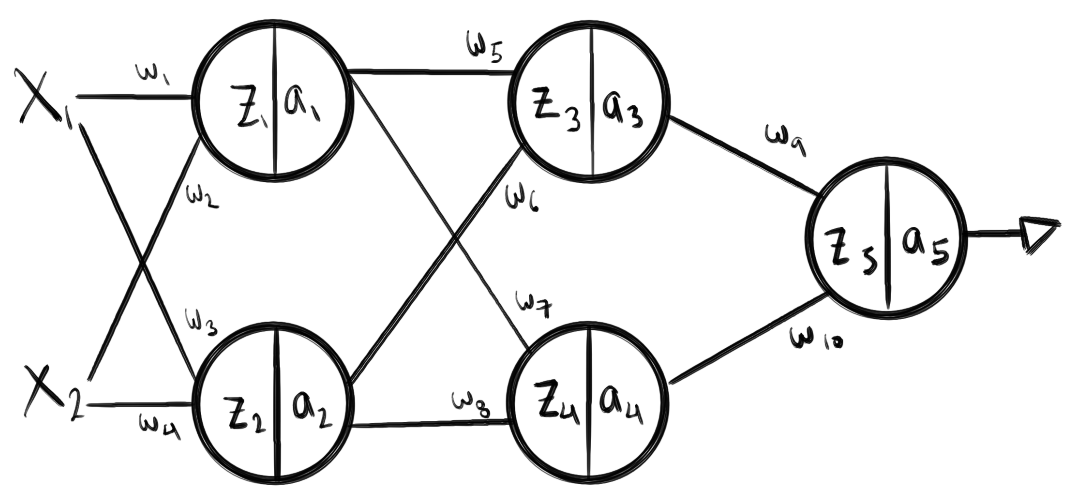

In [1]:
import numpy as np

In [2]:
np.random.seed(42)
x = np.random.random(2)
x

array([0.37454012, 0.95071431])

In [3]:
y = np.random.random()
y

0.7319939418114051

In [4]:
np.random.seed(42)
weights = np.random.random(10)
weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [5]:
np.random.seed(42)
biases = np.random.random(5)/100
biases

array([0.0037454 , 0.00950714, 0.00731994, 0.00598658, 0.00156019])

In [6]:
np.random.seed(42)
eta = np.random.random()/10
eta

0.03745401188473625

In [70]:
x

array([0.37454012, 0.95071431])

In [9]:
def sigmoid(x):
    return 1/(1-np.exp(-x))

In [62]:
# establecemos los valores de entrada
x1 = x[0]
x2 = x[1]

#establecemos la target
y = y

#establecemos el learning rate
alpha = eta

#establecemos los pesos para cada una de las sinapsis

#sinapsis de la primera capa
w1  = weights[0]
w2  = weights[1]
w3  = weights[2]
w4  = weights[3]

#sinapsis de la segunda capa

w5  = weights[4]
w6  = weights[5]
w7  = weights[6]
w8  = weights[7]

# sinapsis de la capa de salida

w9  = weights[8]
w10 = weights[9]

#establecemos los sesgos

b1 = biases[0]
b2 = biases[1]
b3 = biases[2]
b4 = biases[3]
b5 = biases[4]

et = []

for e in range(30):
    
    z1 = x1*w1 + x2*w2 + b1
    z2 = x1*w3 + x2*w4 + b2
    
    a1 = sigmoid(z1)
    a2 = sigmoid(z2)
    
    z3 = a1 * w4 + a2 * w5 + b3
    z4 = a1 * w6 + a2 * w5 + b4
    
    a3 = sigmoid(z3)
    a4 = sigmoid(z4)
    
    z5 = a3 * w8 + a4 * w9 + b5
    
    yhat = z5
    
    err = (y - yhat)**2
    
    et.append(err)
    
    #calculo de errores retropropagados
    delta = err
    
    #ajuste de los pesos
    b1 += (1/2)*alpha*z1*delta
    b2 += (1/2)*alpha*z2*delta
    b3 += (1/2)*alpha*z3*delta
    b4 += (1/2)*alpha*z4*delta
    b5 += (1/2)*alpha*delta
    
    #calculos del incremento de los pesos
    gamma1 = (1-z1**2)*delta*b1
    gamma2 = (1-z2**2)*delta*b2
    gamma3 = (1-z3**2)*delta*b3
    gamma4 = (1-z4**2)*delta*b4
    gamma5 = (1-z5**2)*delta*b5
    
    #ajuste de los pesos
    w1  += (1/2)*alpha*x1*gamma1
    w2  += (1/2)*alpha*x2*gamma1
    w3  += (1/2)*alpha*x1*gamma2
    w4  += (1/2)*alpha*x2*gamma2
    
    w5  += (1/2)*alpha*z1*gamma3
    w6  += (1/2)*alpha*z1*gamma3
    w7  += (1/2)*alpha*z2*gamma4
    w8  += (1/2)*alpha*z2*gamma4
    
    w9  += (1/2)*alpha*z3*gamma5
    w10 += (1/2)*alpha*z4*gamma5
    
    
yhat

0.8939999235657327

In [63]:
yhat

0.8939999235657327

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error([y], [yhat], squared=False))

0.16200598175432757


In [65]:
yhat/y

1.2213214789092717

In [55]:
w1,w2

(0.3039028916601257, 0.7714122261449138)

Hacemos una predicción sobre datos nuevos del modelo entrenado

In [56]:
x_alpha = np.random.random(2)
y_alpha = np.random.random()

In [57]:
x_alpha,y_alpha

(array([0.86617615, 0.60111501]), 0.7080725777960455)

In [66]:
x1 = x_alpha[0]
x2 = x_alpha[1]

z1 = x1*w1 + x2*w2 + b1
z2 = x1*w3 + x2*w4 + b2

a1 = sigmoid(z1)
a2 = sigmoid(z2)

z3 = a1 * w4 + a2 * w5 + b3
z4 = a1 * w6 + a2 * w5 + b4

a3 = sigmoid(z3)
a4 = sigmoid(z4)

z5 = a3 * w8 + a4 * w9 + b5

yhat_alpha = z5

In [67]:
yhat_alpha

0.8857867980036227

In [68]:
print(mean_squared_error([y], [yhat_alpha], squared=False))

0.1537928561922176


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

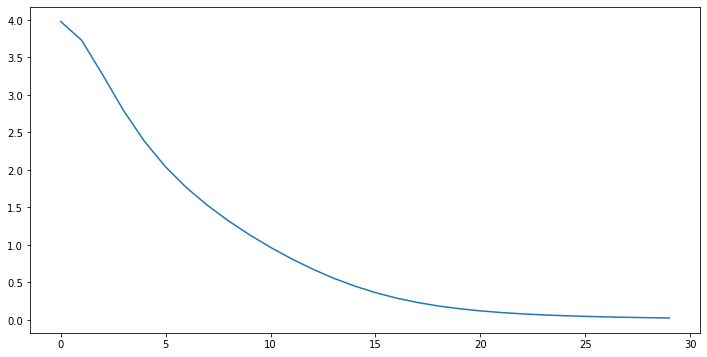

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(x = [i for i in range(len(et))], y = et);